## Pretty setup for Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
new_rc_params = {'text.usetex': True,
    'svg.fonttype': 'none',
    'font.family': 'Linux Libertine',
    'text.latex.preamble': r'\usepackage{libertine}',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'libertine',
    'mathtext.it': 'libertine:italic',
    'mathtext.bf': 'libertine:bold'
    }
mpl.rcParams.update(new_rc_params)
plt.style.use('tableau-colorblind10')
plt.rc('axes', axisbelow=True)

In [2]:
# Taken from
# https://gist.github.com/AndiH/c957b4d769e628f506bd

# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

## Merge logs

In [3]:
import pickle
import os
import numpy as np

plot_path = '<ABSOLUTE_PATH_TO_CODE_HOMEFOLDER>/plots'
logs_path = '<ABSOLUTE_PATH_TO_CODE_HOMEFOLDER>/logs/ope'

In [4]:

def merge_dicts(dicts):
    result = {
            'IPS': {},    
            'SNIPS': {},
            #'DM': {},    
            'DR': {},
            'beta-IPS': {},
        }

    for d in dicts:
        for key, value in d.items():
            for N, expected_val in value.items():
                if N in result[key]:
                    result[key][N].append(expected_val)
                else:
                    result[key][N] = [expected_val]

    return result

In [5]:
from tqdm.notebook import tqdm
iters = []
n_actionss = []
Ns = []
inv_temps = []
methods = []
values = []
sample_vars = []

ope_files = os.listdir(logs_path)


for ope_file in tqdm(ope_files):
    _, iter, n_actions, N, beta = ope_file.split('_')
    with open(os.path.join(logs_path, ope_file), 'rb') as f:
        x = pickle.load(f)
        for method in ['IPS', 'SNIPS', 'DR', 'beta-IPS']:
            iters.append(iter)
            n_actionss.append(n_actions)
            Ns.append(N)
            inv_temps.append(beta)
            methods.append(method)
            values.append(x[method][0])
            sample_vars.append(x[method][1])

  0%|          | 0/16000 [00:00<?, ?it/s]

In [6]:
import pandas as pd
df = pd.DataFrame({
    'iter': iters,
    'A': n_actionss,
    'N': Ns,
    'inv_temp': inv_temps,
    'method': methods,
    'value': values,
    'sample_var': sample_vars,
    'log_value': np.log10(values),
    'log_sample_var': np.log10(sample_vars)
})
df

/var/folders/2g/w978j2w51979_jr1wq8d5ksw0000gq/T/ipykernel_37348/2304037962.py:11: RuntimeWarning: divide by zero encountered in log10
  'log_sample_var': np.log10(sample_vars)


,iter,A,N,inv_temp,method,value,sample_var,log_value,log_sample_var
0,64,50,16681.0,-1.0,IPS,1.273294e-03,0.003761,-2.895071,-2.424719
1,64,50,16681.0,-1.0,SNIPS,3.244196e-04,0.000456,-3.488893,-3.340835
2,64,50,16681.0,-1.0,DR,1.299217e-04,0.000609,-3.886318,-3.215166
3,64,50,16681.0,-1.0,beta-IPS,3.918227e-04,0.000513,-3.406910,-3.289714
4,25,100,129154.0,-1.0,IPS,1.658126e-03,0.001002,-2.780382,-2.999321
...,...,...,...,...,...,...,...,...,...
63995,45,100,16681.0,-1.0,beta-IPS,5.042330e-05,0.001137,-4.297369,-2.944369
63996,48,25,5994.0,-1.0,IPS,1.911880e-03,0.003763,-2.718539,-2.424422
63997,48,25,5994.0,-1.0,SNIPS,7.582360e-08,0.000871,-7.120196,-3.059998
63998,48,25,5994.0,-1.0,DR,9.161430e-05,0.000733,-4.038037,-3.134736


In [8]:
df['method'] = df['method'].apply(lambda s: r'$\beta$-IPS' if s == 'beta-IPS' else s)

## Plot

In [9]:
method2colour = {
    #'DM': tableau20[6],
    'DR': tableau20[7],
    'IPS': tableau20[0],
    'SNIPS': tableau20[2],
    r'$\beta$-IPS': tableau20[4]
}

method2marker = {
    #'DM': tableau20[6],
    'DR': 'o',
    'IPS': '4',
    'SNIPS': 's',
    r'$\beta$-IPS': 'P'
}

In [10]:
import numpy as np
import scipy.stats


eps = 1e-7
# 50th Percentile
def ql(x):
    return x.quantile(0.25)

# 90th Percentile
def qu(x):
    return x.quantile(0.975)


def plot_performance_mse(df):
    figsize=(14,7)
    fontsize=18
    
    fig, axes = plt.subplots(4, 4, sharex='col', sharey='row', figsize = figsize)
    z = scipy.stats.norm.ppf(1.0 - 0.05/2.0)
    
    As = ['25', '50', '75', '100']
    invtemps = ['-5.0', '-1.0', '1.0', '5.0'][::-1]
    
    for row, invtemp in zip(axes, invtemps):
        for ax, A in zip(row, As):
            subdf = df.loc[(df.A == A) & (df.inv_temp == invtemp)].groupby(['method', 'N'])['value'].agg([np.mean, np.std, ql, qu, len])
            
            subdf = subdf.reset_index()
            
            for method in ['IPS', 'DR', 'SNIPS', r'$\beta$-IPS']:
                subsubdf = subdf.loc[subdf.method == method].copy()    
                subsubdf['N'] = subsubdf['N'].astype(np.float32)
                subsubdf = subsubdf.sort_values('N')
                                
                x = subsubdf['N'].astype(np.float32).values
                y = subsubdf['mean'].astype(np.float32).values 
                y_err = subsubdf['std'].astype(np.float32).values / np.sqrt(subsubdf['len'].astype(np.float32).values)
                #y_err_lb = subsubdf['ql'].astype(np.float32).values / np.sqrt(subsubdf['len'].astype(np.float32).values)
                #y_err_ub = subsubdf['qu'].astype(np.float32).values / np.sqrt(subsubdf['len'].astype(np.float32).values)
                                
                ax.plot(x, y, label=method, color=method2colour[method], marker=method2marker[method])
                positive = y-z*y_err > 0
                ax.fill_between(x, y-z*y_err, y+z*y_err, where=positive, alpha=0.2, color=method2colour[method])
                #ax.fill_between(x, y_err_lb, y_err_ub, alpha=0.2, color=method2colour[method])
                
            ax.set_xscale('log')
            ax.set_yscale('log')                
            ax.grid(axis='y', ls='--', alpha=.5)

            if A == As[0]:
                ax.set_ylabel('MSE', fontsize=fontsize-2)
            if A == As[-1]:
                ax.text(1.01, .55, 'InvTemp\n='+fr'${int(float(invtemp))}$', ha='left', va='top', transform=ax.transAxes, fontsize=fontsize-4)

            if invtemp == invtemps[-1]:
                ax.set_xlabel(r'$N$', fontsize=fontsize-2)
            if invtemp == invtemps[0]:
                ax.set_title(r'$|\mathcal{A}| =' + A + '$', fontsize=fontsize)

            ax.xaxis.set_tick_params(labelsize=fontsize-4)            
            ax.yaxis.set_tick_params(labelsize=fontsize-4)

    plt.tight_layout()
    plt.legend(fontsize=fontsize-2, ncol=len(methods), loc='upper right', bbox_to_anchor=(0.0,-.3))
    plt.savefig('Fig_All_MSE.pdf', bbox_inches='tight')
    plt.show()

In [11]:
def plot_performance_var(df):
    figsize=(14,7)
    fontsize=18
    
    fig, axes = plt.subplots(4, 4, sharex='col', sharey='row', figsize = figsize)
    z = scipy.stats.norm.ppf(1.0 - 0.05/2.0)
    
    As = ['25', '50', '75', '100']
    invtemps = ['-5.0', '-1.0', '1.0', '5.0'][::-1]
    
    for row, invtemp in zip(axes, invtemps):
        for ax, A in zip(row, As):
            subdf = df.loc[(df.A == A) & (df.inv_temp == invtemp)].groupby(['method', 'N'])['sample_var'].agg([np.mean, np.std, len])
            
            subdf = subdf.reset_index()
            
            for method in ['IPS', 'DR', 'SNIPS', r'$\beta$-IPS']:
                subsubdf = subdf.loc[subdf.method == method].copy()    
                subsubdf['N'] = subsubdf['N'].astype(np.float32)
                subsubdf = subsubdf.sort_values('N')
                                
                x = subsubdf['N'].astype(np.float32).values
                y = subsubdf['mean'].astype(np.float32).values
                y_err = subsubdf['std'].astype(np.float32).values / np.sqrt(subsubdf['len'].astype(np.float32).values)
                ax.plot(x, y, label=method, color=method2colour[method], marker=method2marker[method],)
                positive = y-z*y_err > 0
                ax.fill_between(x, y-z*y_err, y+z*y_err, where=positive,  alpha=0.2, color=method2colour[method])
                
            ax.set_xscale('log')
            ax.set_yscale('log')                
            ax.grid(axis='y', ls='--', alpha=.5)

            if A == As[0]:
                ax.set_ylabel('Variance', fontsize=fontsize-2)
            if A == As[-1]:
                ax.text(1.01, .55, 'InvTemp\n='+fr'${int(float(invtemp))}$', ha='left', va='top', transform=ax.transAxes, fontsize=fontsize-4)

            if invtemp == invtemps[-1]:
                ax.set_xlabel(r'$N$', fontsize=fontsize-2)
            if invtemp == invtemps[0]:
                ax.set_title(r'$|\mathcal{A}| =' + A + '$', fontsize=fontsize)
            ax.xaxis.set_tick_params(labelsize=fontsize-4)            
            ax.yaxis.set_tick_params(labelsize=fontsize-4)
            
    plt.tight_layout()
    plt.legend(fontsize=fontsize-2, ncol=len(methods), loc='upper right', bbox_to_anchor=(0.0,-.3))
    plt.savefig('Fig_All_var.pdf', bbox_inches='tight')
    plt.show()

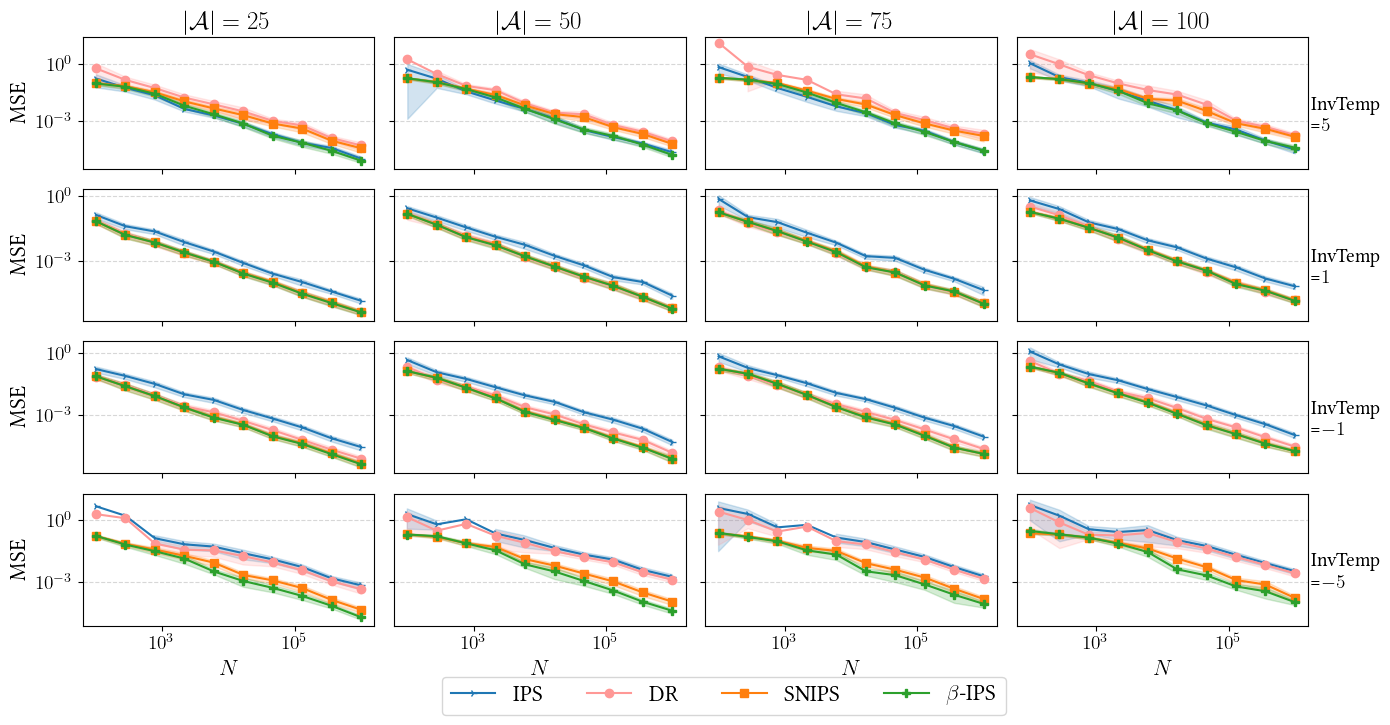

In [12]:
plot_performance_mse(df)

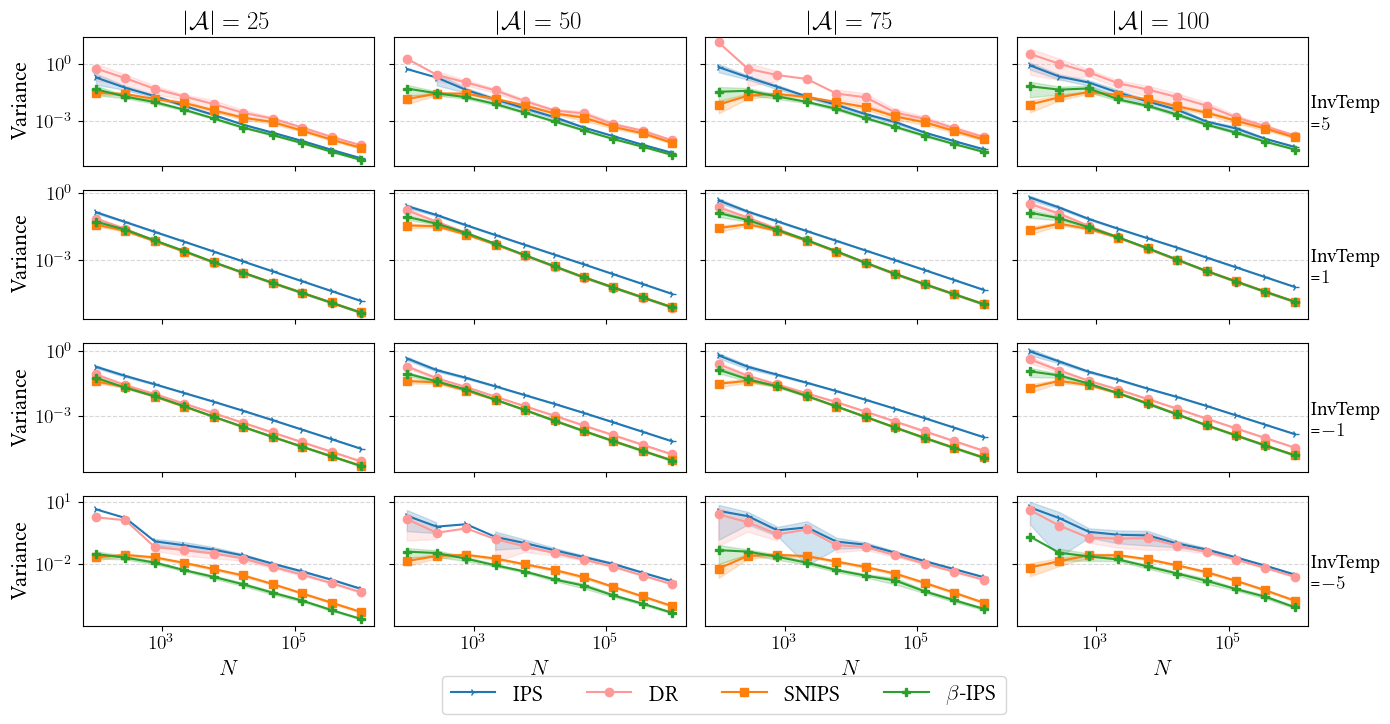

In [13]:
plot_performance_var(df)

# OPL plotting - full-batch

In [14]:
def parse_values(lr, logs_path):
    value_files = os.listdir(logs_path)
    result = {
            'IPS': [],    
            'SNIPS': [],
            r'$\beta$-IPS': [],
        }

    grad_result = {
            'IPS': [],    
            'SNIPS': [],
            r'$\beta$-IPS': [],
        }

    for value_file in value_files:
        if 'banditnet_val' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                result['SNIPS'].append(x)
        
        elif 'ips_val' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                result['IPS'].append(x)
        
        elif 'opt_baseline_val' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                result[r'$\beta$-IPS'].append(x)
        
        elif 'banditnet_grad_var' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                grad_result['SNIPS'].append(x)
        
        elif 'ips_grad_var' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                grad_result['IPS'].append(x)
        
        elif 'opt_baseline_grad_var' in value_file and str(lr) in value_file:
            with open(os.path.join(logs_path, value_file), 'rb') as f:
                x = pickle.load(f)
                grad_result[r'$\beta$-IPS'].append(x)        
        
    plot_result = {
            'IPS': [],    
            'SNIPS': [],
            r'$\beta$-IPS': [],
        }
    
    plot_grad_var = {
            'IPS': [],    
            'SNIPS': [],
            r'$\beta$-IPS': [],
        }
    
    for key, value in result.items():
        plot_result[key] = np.array(value)
        
    for key, value in grad_result.items():
        plot_grad_var[key] = np.array(value)

    
    return plot_result, plot_grad_var

In [15]:
def plot_performance(lr2value, name):
    z = scipy.stats.norm.ppf(1.0 - 0.05/2.0)
    fontsize=18
    fig, axes = plt.subplots(1, len(lr2value), sharey='row', figsize=(14, 3.2))
    
    for ax, (lr, plot_result) in zip(axes, lr2value.items()):        
        for method, policy_values_method in plot_result.items():
            x = np.asarray(range(policy_values_method.shape[1]))
            y = np.asarray((policy_values_method).mean(0) )
            y_err = np.sqrt(np.var(policy_values_method, axis=0)/policy_values_method.shape[0])

            ax.plot(x,y, label=('BanditNet' if (name=='MiniBatch' and method=='SNIPS') else method), color=method2colour[method], marker=method2marker[method], markevery=len(x)//10)
            ax.fill_between(x, y-z*y_err, y+z*y_err, alpha=0.2, color=method2colour[method])
            
        ax.set_xlabel('Training Epoch', fontsize=fontsize-2)
        if lr == 0.1:
            ax.set_ylabel(r'$\widehat{V}(\pi_{\theta})$', fontsize=fontsize-2)
            #ax.legend(fontsize=fontsize-2)

        ax.set_yscale('log')
        ax.grid(axis='y',which="both", ls='--', alpha=.5)
        
        ax.xaxis.set_tick_params(labelsize=fontsize-4)            
        ax.yaxis.set_tick_params(labelsize=fontsize-4)
        
        ax.set_title(fr'Learning rate = ${lr}$', fontsize=fontsize-2)
    plt.tight_layout()
    plt.legend(fontsize=fontsize-2, ncol=len(plot_result), loc='upper right', bbox_to_anchor=(0.0,-.2))
    plt.savefig(os.path.join(plot_path, f'RecSys24_Fig_OPL_{name}.pdf'), bbox_inches='tight')
    plt.show()

In [16]:
def plot_grad(lr2grad, name):
    z = scipy.stats.norm.ppf(1.0 - 0.05/2.0)
    fontsize=18
    fig, axes = plt.subplots(1, len(lr2grad), sharey='row', figsize=(14, 3.2))
    
    for ax, (lr, plot_result) in zip(axes, lr2grad.items()):        
        for method, policy_values_method in plot_result.items():
            x = np.asarray(range(policy_values_method.shape[1]))
            y = np.asarray((policy_values_method).mean(0) )
            y_err = np.sqrt(np.var(policy_values_method, axis=0)/policy_values_method.shape[0])

            ax.plot(x,y, label=('BanditNet' if (name=='MiniBatch' and method=='SNIPS') else method), color=method2colour[method], marker=method2marker[method], markevery=len(x)//10)
            ax.fill_between(x, y-z*y_err, y+z*y_err, alpha=0.2, color=method2colour[method])
            
        ax.set_xlabel('Training Epoch', fontsize=fontsize-2)
        if lr == 0.1:
            ax.set_ylabel(r'${\rm Var}\left(\nabla_{\theta}\widehat{V}(\pi_{\theta})\right)$', fontsize=fontsize-2)
            ax.set_yscale('log')
            
            ax.set_ylim(1e-8,1e-1)
            
        ax.grid(axis='y',which="major", ls='--', alpha=.5)
        
        ax.xaxis.set_tick_params(labelsize=fontsize-4)            
        ax.yaxis.set_tick_params(labelsize=fontsize-4)
        
        ax.set_title(fr'Learning rate = ${lr}$', fontsize=fontsize-2)
    plt.tight_layout()
    plt.legend(fontsize=fontsize-2, ncol=len(plot_result), loc='upper right', bbox_to_anchor=(0.0,-.2))
    plt.savefig(os.path.join(plot_path, f'RecSys24_Fig_OPL_var_{name}.pdf'), bbox_inches='tight')
    plt.show()

In [17]:
lrs = [0.1, 0.01, 0.001]
lr2value = {}
lr2grad = {}

for lr in lrs:
    v, g = parse_values(lr, '<ABSOLUTE_PATH_TO_CODE_HOMEFOLDER>/logs/opl/fb')
    lr2value[lr] = v
    lr2grad[lr] = g

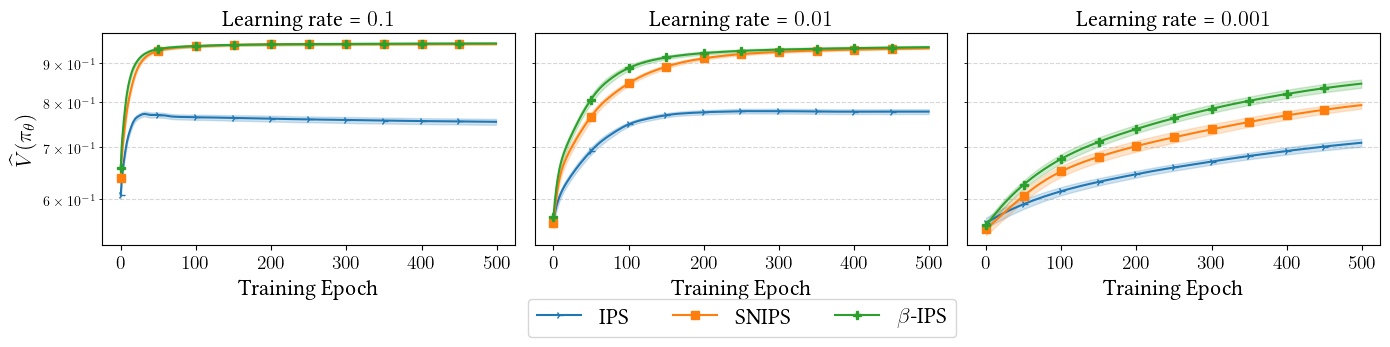

In [18]:
plot_performance(lr2value, 'FullBatch')

# OPL Plotting -- Mini-batch

In [19]:
lrs = [0.1, 0.01, 0.001]
lr2value = {}
lr2grad = {}

for lr in lrs:
    v, g = parse_values(lr, '<ABSOLUTE_PATH_TO_CODE_HOMEFOLDER>/logs/opl/mb')
    lr2value[lr] = v
    lr2grad[lr] = g

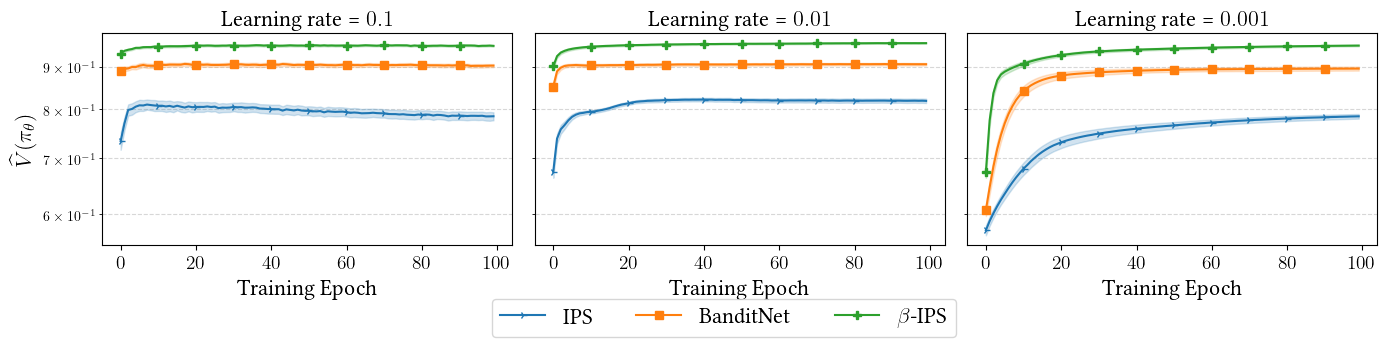

In [20]:
plot_performance(lr2value, 'MiniBatch')

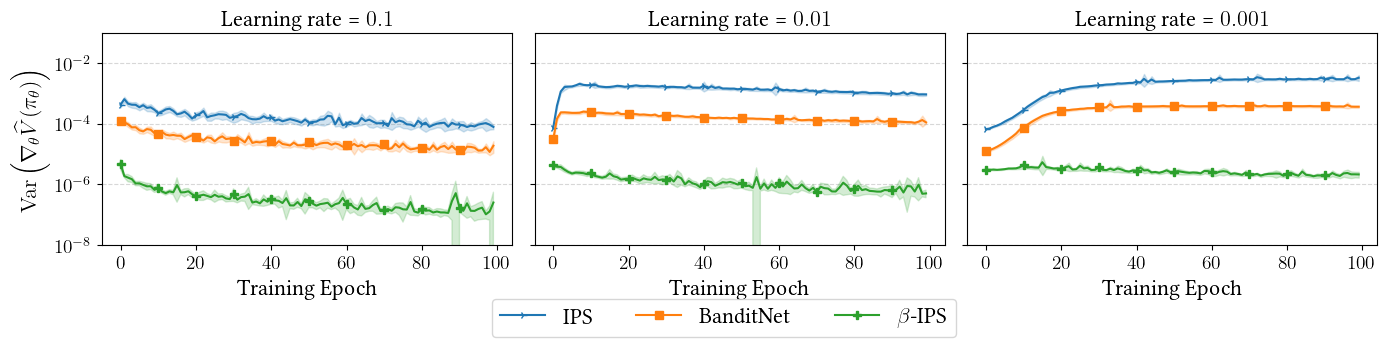

In [21]:
plot_grad(lr2grad, 'MiniBatch')